In [1]:
import numpy as np
import matplotlib.pyplot as plt
from thermopot import materials, calculations, reactions, potentials 

/Users/prakriti/ThermoPot/thermopot/potentials.py:27: SyntaxWarning: invalid escape sequence '\D'
  """
/Users/prakriti/ThermoPot/thermopot/potentials.py:50: SyntaxWarning: invalid escape sequence '\d'
  x_unitlabel = "$\degree$C"


In [2]:
data_path = "/Users/prakriti/ThermoPot/BaZrS3/"
BaZrS3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/ternary/BaZrS3_Pnma/scan/aims.out")


BaS_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS_Fm-3m/scan/aims.out")
BaS2_calc  = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS2_C2_c/scan/aims.out")
BaS3_P4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS3_P-421m/scan/aims.out")
BaS3_P2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS3_P2_12_12/scan/aims.out")
Ba2S3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/Ba2S3_I4_1md/scan/aims.out")


ZrS_P4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS_P4_nmm/scan/aims.out")
ZrS_Fm_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS_Fm-3m/scan/aims.out")
ZrS3_P2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS3_P2_1m/scan/aims.out")
ZrS2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS2_P-3m1/scan/aims.out")
Zr3S4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/Zr3S4_Fd-3m/scan/aims.out")

Ba_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Ba_Im-3m/scan/aims.out")
Zr_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Zr_P63_mmc/scan/aims.out")
S_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S_P2_c/scan/aims.out")

S2_calculation = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S2/scan/aims.out",gas=True)
S8_calculation = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S8/scan/aims.out",gas=True)

In [3]:
BaZrS3 = materials.Solid("BaZrS3",{"Ba": 1,"Zr": 1,"S":3},"../BaZrS3/phonopy_output/BaZrS3_Pnma.dat",calculation=BaZrS3_calc)

BaS = materials.Solid("BaS", {"Ba":1, "S": 1},"../BaZrS3/phonopy_output/BaS_Fm-3m.dat",calculation=BaS_calc)
BaS2 = materials.Solid("BaS2", {"Ba":1, "S": 2},"../BaZrS3/phonopy_output/BaS2_C2_c.dat",calculation=BaS2_calc)
BaS3_P4 = materials.Solid("BaS3", {"Ba":1, "S": 3},"../BaZrS3/phonopy_output/BaS3_P-421m.dat",calculation=BaS3_P4_calc)
BaS3_P2 = materials.Solid("BaS3_P2", {"Ba":1, "S": 3},"../BaZrS3/phonopy_output/BaS3_P2_12_12.dat",calculation=BaS3_P2_calc)
Ba2S3 = materials.Solid("Ba2S3", {"Ba":2, "S": 3},"../BaZrS3/phonopy_output/Ba2S3_I4_1md.dat",calculation=Ba2S3_calc)

ZrS_P4 = materials.Solid("ZrS2",{"Zr": 1,"S": 1},"../BaZrS3/phonopy_output/ZrS_P4_nmm.dat",calculation=ZrS_P4_calc)
ZrS_Fm = materials.Solid("ZrS2",{"Zr": 1,"S": 1},"../BaZrS3/phonopy_output/ZrS_Fm-3m.dat",calculation=ZrS_Fm_calc)
ZrS3_P2 = materials.Solid("ZrS2",{"Zr": 1,"S": 3},"../BaZrS3/phonopy_output/ZrS3_P2_1m.dat",calculation=ZrS3_P2_calc)
ZrS2 = materials.Solid("ZrS2",{"Zr": 1,"S": 2},"../BaZrS3/phonopy_output/ZrS2_P-3m1.dat",calculation=ZrS2_calc)
Zr3S4 = materials.Solid("ZrS2",{"Zr": 3,"S": 4},"../BaZrS3/phonopy_output/Zr3S4_Fd-3m.dat",calculation=Zr3S4_calc)

import sys
sys.path.insert(0, "..")

S8 = materials.IdealGas("S8",{'S':8},"../BaZrS3/nist_janaf/S8.dat",calculation=S8_calculation)
S2 = materials.IdealGas("S2",{'S':2},"../BaZrS3/nist_janaf/S2.dat",calculation=S2_calculation)

Ba = materials.Solid("Ba",{"Ba": 1},"../BaZrS3/phonopy_output/Ba_Im-3m.dat",calculation=Ba_calc)
Zr = materials.Solid("Zr",{"Zr": 1},"../BaZrS3/phonopy_output/Zr_P63_mmc.dat",calculation=Zr_calc)
S =  materials.Solid("S",{"S":1},"../BaZrS3/phonopy_output/S_adam.dat",calculation=S_calc)


In [4]:
T = np.linspace(273,1273,100) # K
P = np.array( np.logspace(-3,7,100),ndmin=2).transpose() # Pa

# Elemental reactions 
## Ba + Zr + 3S --> BaZrS3 

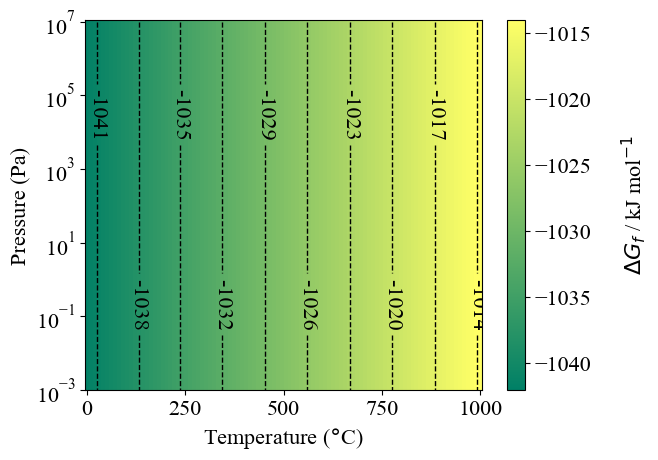

In [5]:
bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1},temperature=T,pressure=P)
GFE = bulk_reaction.Dmu(xc='scan',units="kJ")
GFE.plot_TvsP(scale_range=[-1042,-1014],T_units="C",filename='main/solid_reaction_BZS.pdf')

Standard heat of formation phase diagram. This tells us that the perovskite is stable compared to the consituent elements in thier most stable forms. 

## 8Ba + 8Zr + S8 --> 8BaZrS3 

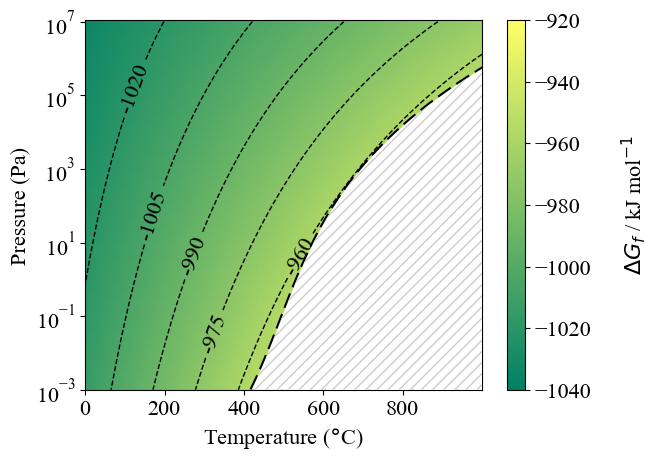

In [6]:
S8_reaction = reactions.Reaction({Ba:8,Zr:8,S8:3},{BaZrS3:8},temperature=T,pressure=P,fu=8)
GFE = S8_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-1040, -920],sulphur_gas=True,filename='main/Ba-Zr-S8--BZS.svg',T_units="C",gas_phase="S8")

S8 is the 

## 2Ba + 2Zr + 3S2 --> 2BaZrS3

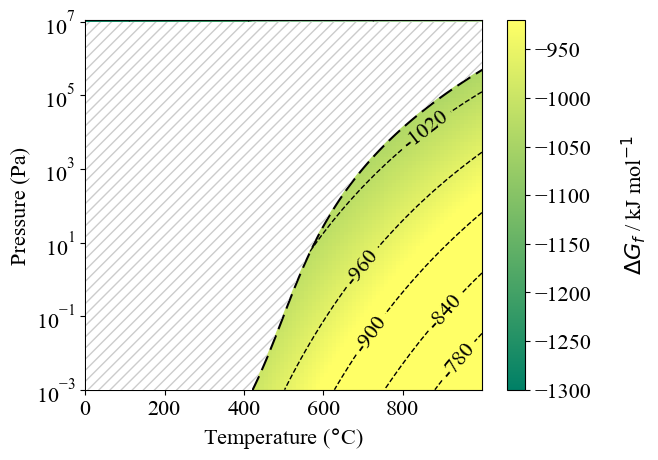

In [7]:
S2_reaction = reactions.Reaction({Ba:2,Zr:2,S2:3},{BaZrS3:2},temperature=T,pressure=P,fu=2)
vars(S2_reaction)
GFE = S2_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-1300, -920],sulphur_gas=True,filename='main/Ba-Zr-S2--BZS.svg',T_units="C", gas_phase="S2")

# Stable binaries 
## BaS + ZrS2 --> BaZrS3 

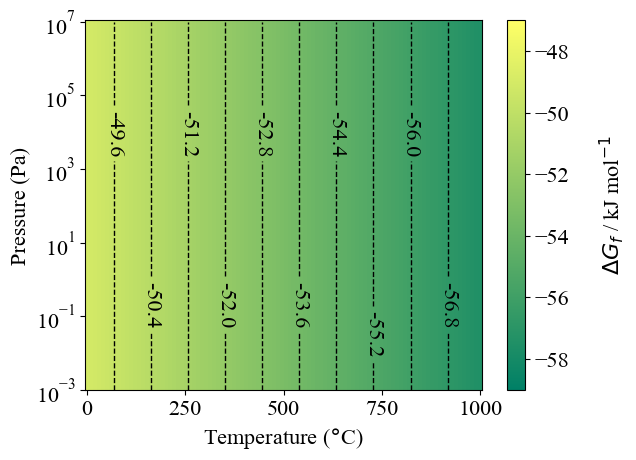

In [8]:
bulk_reaction = reactions.Reaction({BaS:1, ZrS2:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-59,-47],precision='%3.1f',filename='main/BaS-ZrS2--BZS.svg',T_units="C")

These are the most stable binaries. Entropy stabilises this system - the product gets more stable with temperature. 

## BaS2 + ZrS (Tetragonal) --> BaZrS3 (supp)

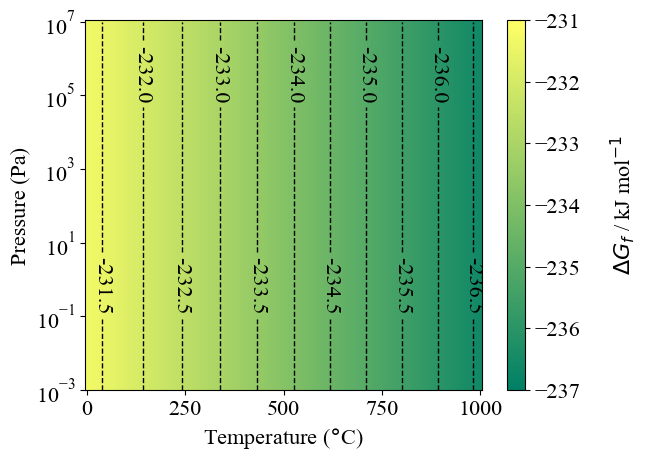

In [9]:
bulk_reaction = reactions.Reaction({BaS2:1, ZrS_P4:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-237,-231],precision='%3.1f',filename='SI/BaS2-ZrStet--BZS.svg',T_units="C")

Entropy stabilises this system - the product gets more stable with temperature. For completenessm can be moved to the SI. 

## BaS2 + ZrS (cubic) --> BaZrS3 (supp)

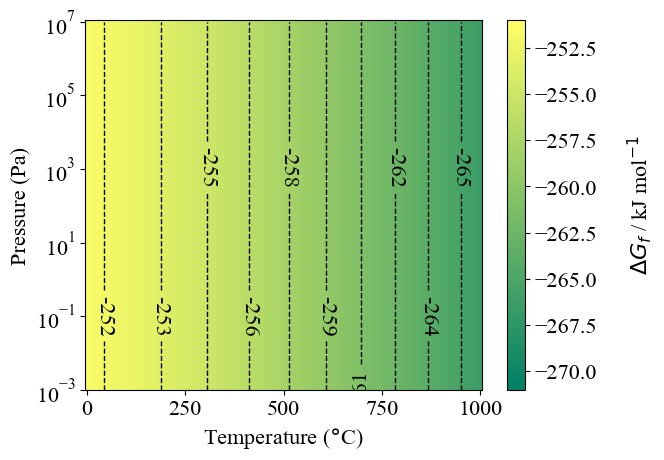

In [10]:
bulk_reaction = reactions.Reaction({BaS2:1, ZrS_Fm:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-271,-251],filename='SI/BaS2-ZrScub-BZS.svg',T_units="C")

ZrS cubic is the more stable polymorph of the ZrS anyway so this makes sense. 
Entropy stabilises this system - the product gets more stable with temperature.  
Ofcourse this is for completeness and can be moved to the SI

## BaS3 (Tetragonal) + Zr --> BaZrS3 (supp)

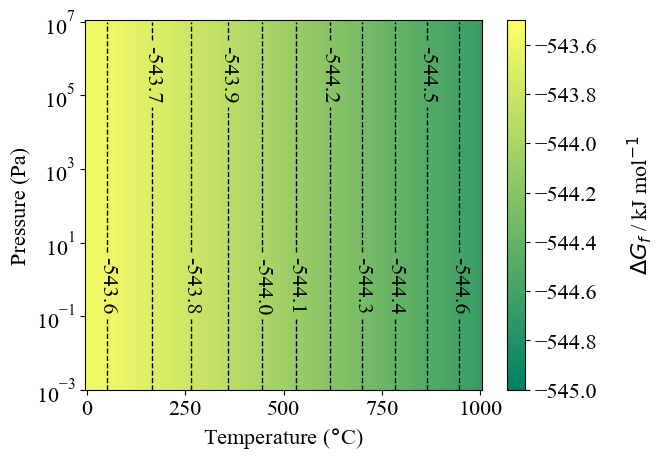

In [11]:
bulk_reaction = reactions.Reaction({BaS3_P4:1, Zr:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-545,-543.5],precision='%3.1f',filename='SI/BaS3P4-Zr--BZS.svg',T_units="C")

This is also the other balanced equation possible from the binary. Only one binary (BaS3) in the reactants in this case. Entropy stabilises this system - the product gets more stable with temperature. This is for completeness, can be moved to the SI

## BaS3 (Tetragonal) + Zr --> BaZrS3 (supp)

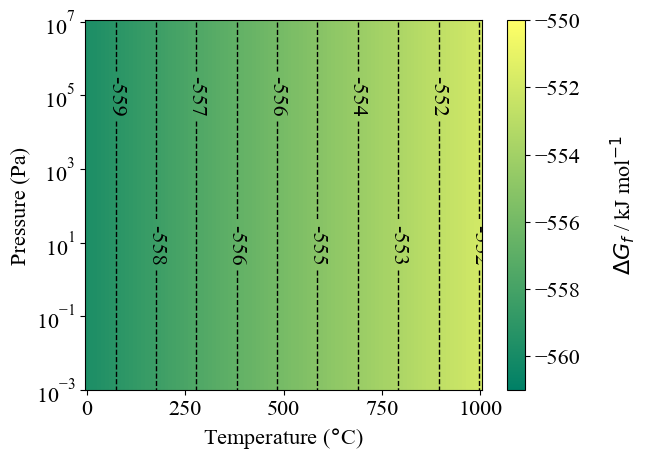

In [12]:
bulk_reaction = reactions.Reaction({BaS3_P2:1, Zr:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-561,-550],filename='SI/BaS3P2-Zr--BZS.svg',T_units="C")

BaS3 has two polymorphs. Here for completeness. This is interesting because this is the only reaction that does not stabilize with entropy. I wonder if it is because this BaS3 polymorph is low in symmetry to begin with (orthorhombic). I see this as further motivation to plot the different components of the GFE...

## BaS + Zr + 2S --> BaZrS3 (supp)

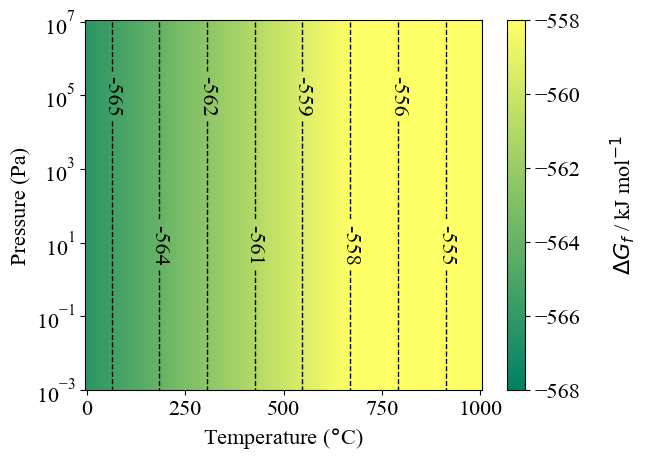

In [13]:
bulk_reaction = reactions.Reaction({BaS:1,Zr:1,S:2},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE_4310.plot_TvsP(scale_range=[-568,-558],filename='SI/BaS-Zr-S--BZS.svg',T_units="C")

## BaS + S2 + Zr --> BaZrS3 (supp)

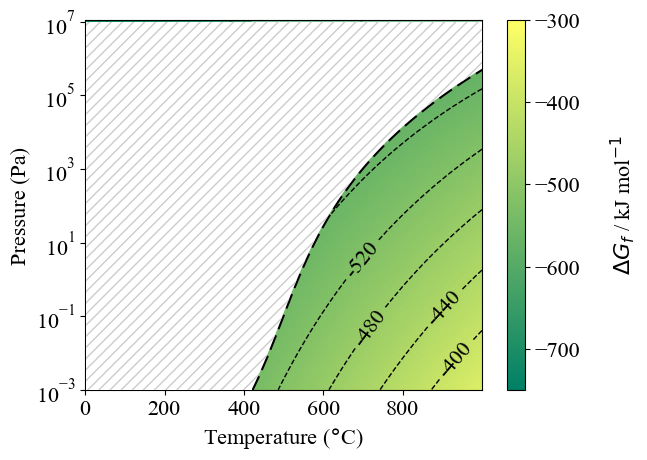

In [14]:
S2_reaction = reactions.Reaction({BaS:1,S2:1,Zr:1},{BaZrS3:1}, temperature=T, pressure=P,fu=1)
GFE = S2_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-750, -300],sulphur_gas=True,filename='SI/BaS-S2-Zr--BZS.svg',T_units="C", gas_phase="S2")

## 8BaS + 2S8 + 8Zr --> 8BaZrS3 (supp)

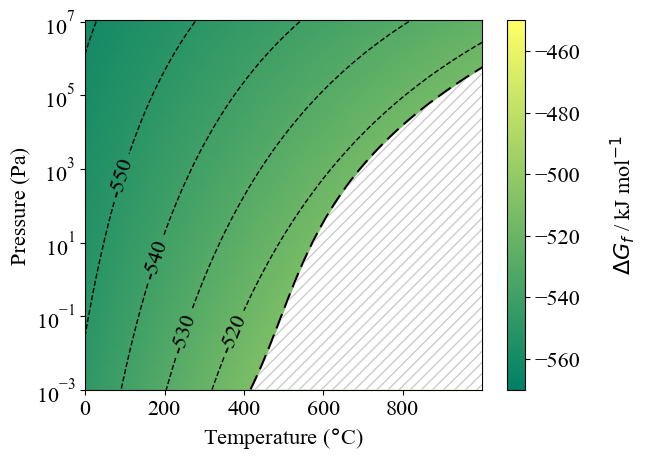

In [15]:
S8_reaction = reactions.Reaction({BaS:8,S8:2,Zr:8},{BaZrS3:8}, temperature=T, pressure=P,fu=8)
GFE = S8_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-570, -450],sulphur_gas=True,filename='SI/BaS-S8-Zr--BZS.svg',T_units="C",gas_phase="S8")

## 2BaS + 2ZrS3 --> 2BaZrS3 + S2 

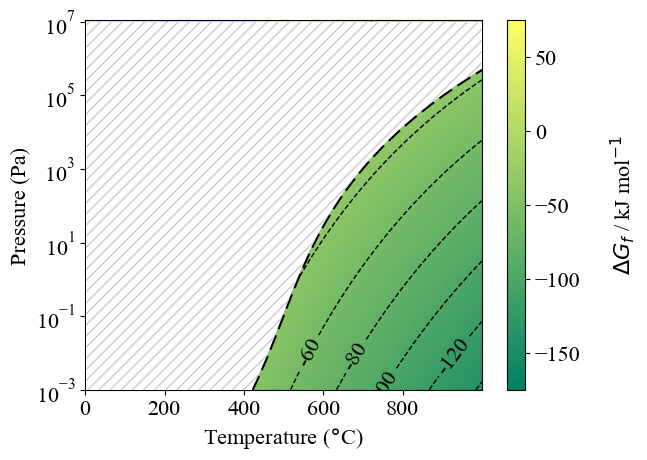

In [16]:
bulk_reaction = reactions.Reaction({BaS:2, ZrS3_P2:2},{BaZrS3:2, S2:1},temperature=T, pressure=P, fu=2)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-175,75],sulphur_gas=True,filename='main/BaS-ZrS3--BZS-S2.svg',T_units="C",gas_phase="S2")

## 8BaS + 8ZrS3 --> 8BaZrS3 + S8 

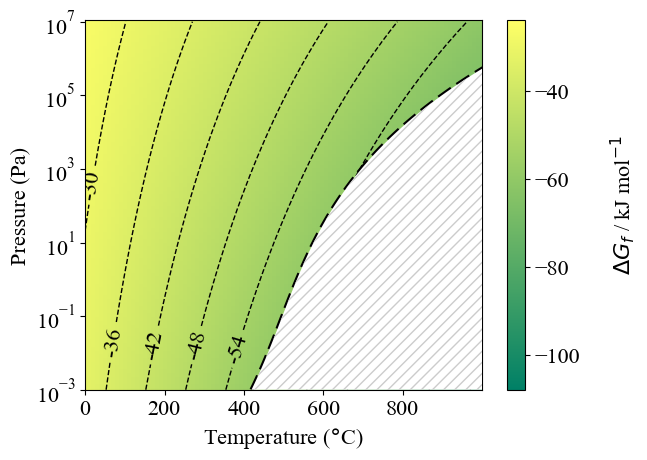

In [17]:
bulk_reaction = reactions.Reaction({BaS:8, ZrS3_P2:8},{BaZrS3:8, S8:1},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-108,-24],sulphur_gas=True,filename='main/BaS-ZrS3--BZS-S8.svg',T_units="C",gas_phase="S8")

## BaS2 + ZrS3 --> BaZrS3 + S2

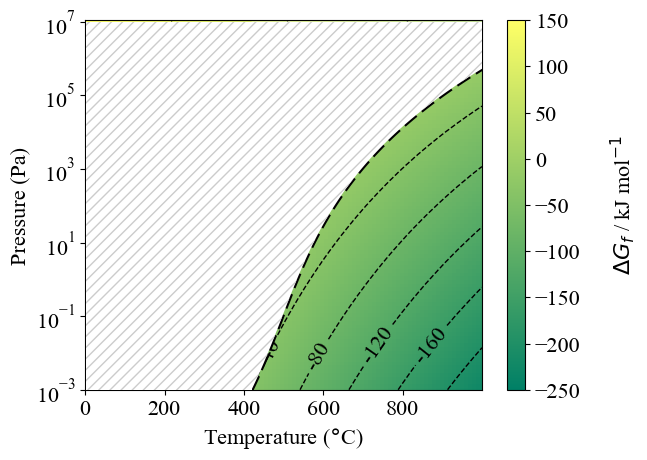

In [18]:
bulk_reaction = reactions.Reaction({BaS2:1, ZrS3_P2:1},{BaZrS3:1, S2:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-250,150],sulphur_gas=True,filename='main/BaS2-ZrS3--BZS-S2.svg',T_units="C",gas_phase="S2")

## 8BaS2 + 8ZrS3 --> 8BaZrS3 + 2S8

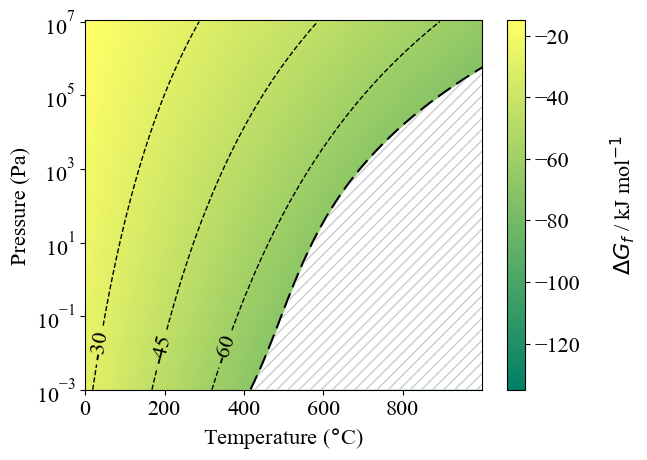

In [19]:
bulk_reaction = reactions.Reaction({BaS2:8, ZrS3_P2:8},{BaZrS3:8, S8:2},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-135,-15],sulphur_gas=True,filename='main/BaS2-ZrS3--BZS-S8.svg',T_units="C",gas_phase="S8")

## 2BaS3 + 2ZrS3 --> 2BaZrS3 +  3S2

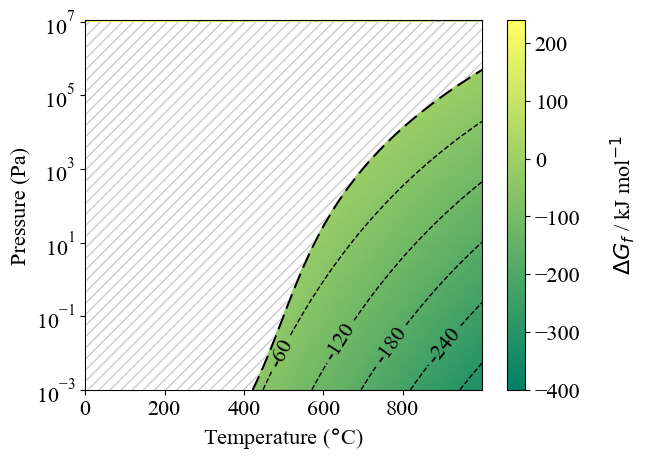

In [20]:
bulk_reaction = reactions.Reaction({BaS3_P4:2,ZrS3_P2:2},{BaZrS3:2,S2:3},temperature=T, pressure=P, fu=2)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE_4310.plot_TvsP(scale_range=[-400,240],sulphur_gas=True,filename='main/BaS3-ZrS3--BZS-S2.svg',T_units="C",gas_phase="S2")

## 8BaS3 + 8ZrS3 --> 8BaZrS3 +  3S8

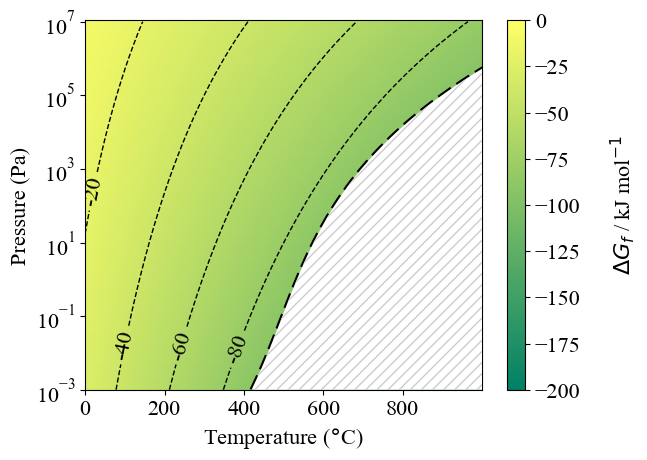

In [21]:
bulk_reaction = reactions.Reaction({BaS3_P4:8,ZrS3_P2:8},{BaZrS3:8,S8:3},temperature=T, pressure=P, fu=8)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE_4310.plot_TvsP(scale_range=[-200,0],sulphur_gas=True,filename='main/BaS3-ZrS3--BZS-S8.svg',T_units="C",gas_phase="S8")

## 2BaS2 + 2ZrS2 --> 2BaZrS3 +  S2 

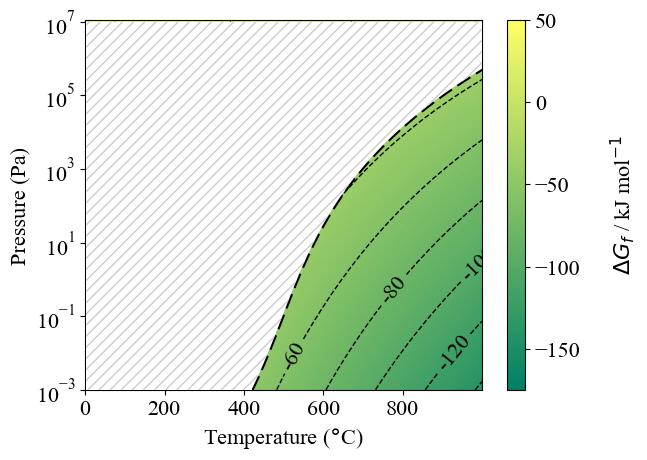

In [22]:
bulk_reaction = reactions.Reaction({BaS2:2,ZrS2:2},{BaZrS3:2,S2:1},temperature=T, pressure=P, fu=2)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE_4310.plot_TvsP(scale_range=[-175,50],sulphur_gas=True,filename='main/BaS2-ZrS2--BZS-S2.svg',T_units="C",gas_phase="S2")

## 8BaS2 + 8ZrS2 --> 8BaZrS3 +  S8

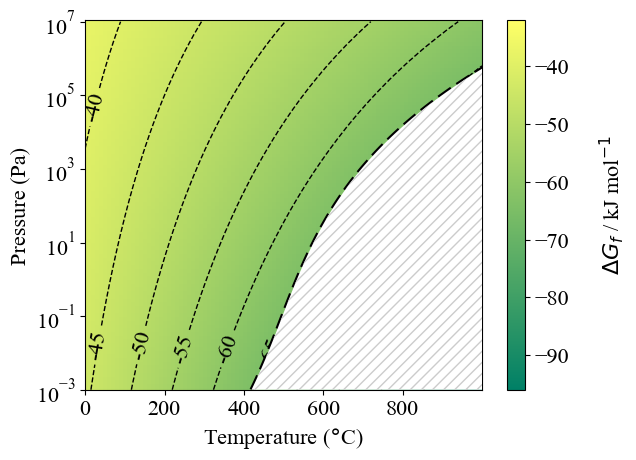

In [23]:
bulk_reaction = reactions.Reaction({BaS2:8,ZrS2:8},{BaZrS3:8,S8:1},temperature=T, pressure=P, fu=8)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE_4310.plot_TvsP(scale_range=[-96,-32],sulphur_gas=True,filename='main/BaS2-ZrS2--BZS-S8.svg',T_units="C",gas_phase="S8")

## BaS3 + ZrS2 --> BaZrS3 +  S2 

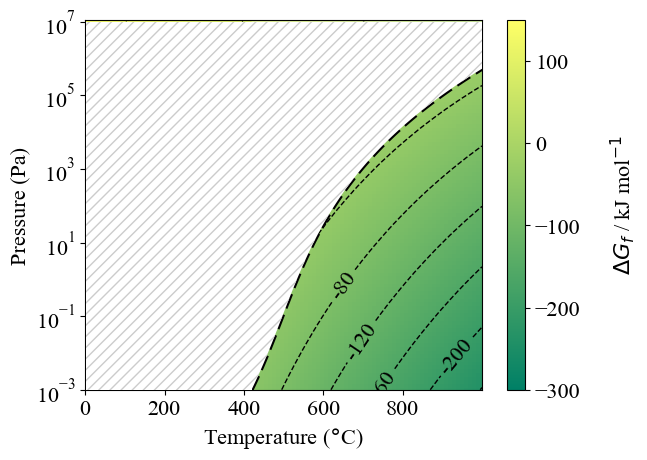

In [24]:
bulk_reaction = reactions.Reaction({BaS3_P4:1,ZrS2:1},{BaZrS3:1,S2:1},temperature=T, pressure=P, fu=1)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE_4310.plot_TvsP(scale_range=[-300,150],sulphur_gas=True,filename='main/BaS3-ZrS2--BZS-S2.svg',T_units="C",gas_phase="S2")

## 8BaS3 + 8ZrS2 --> 8BaZrS3 +  2S8 

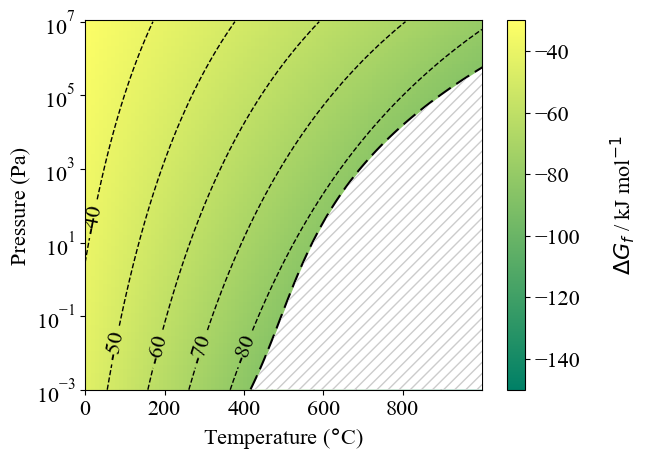

In [25]:
bulk_reaction = reactions.Reaction({BaS3_P4:8,ZrS2:8},{BaZrS3:8,S8:2},temperature=T, pressure=P, fu=8)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE_4310.plot_TvsP(scale_range=[-150,-30],sulphur_gas=True,filename='main/BaS3-ZrS2--BZS-S8.svg',T_units="C",gas_phase="S8")

## Ba-S system
### with S2 
2Ba +  3S2 --> 2BaS  + 2S2     
2Ba +  3S2 --> 2BaS2 +  S2     
2Ba +  3S2 --> 2BaS3 (P4)     
2Ba +  3S2 --> 2BaS3 (P2)               

In [26]:
bulk_reaction = reactions.Reaction({Ba:1,S:2},{BaS2:1})
print(bulk_reaction.DE(xc='scan')/5)

-1.0236545903608203


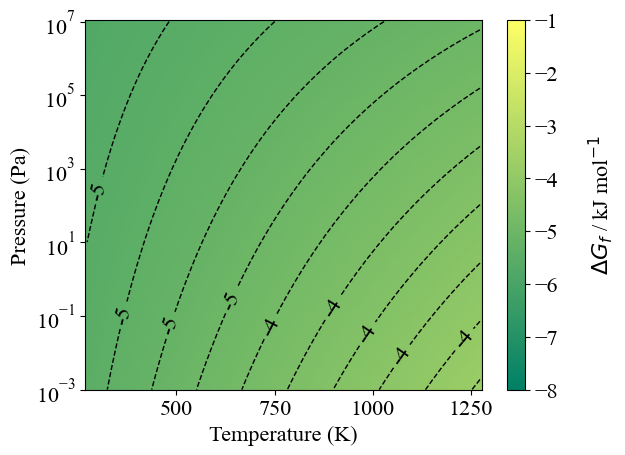

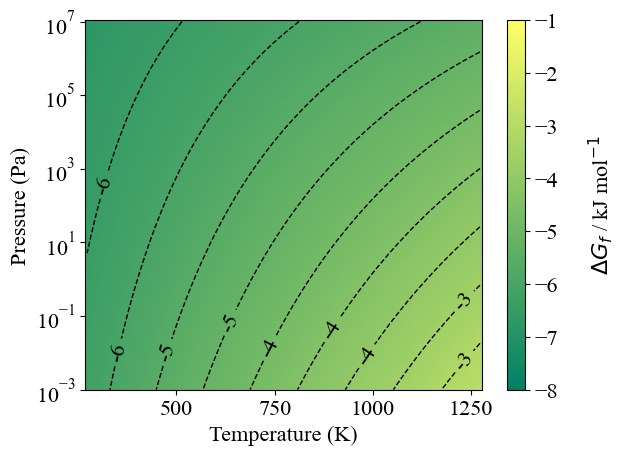

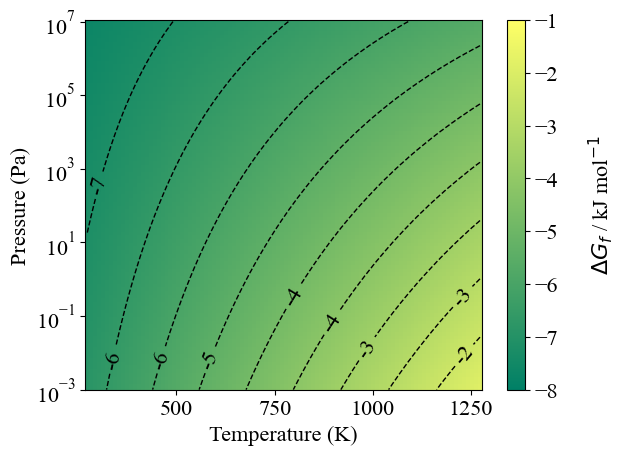

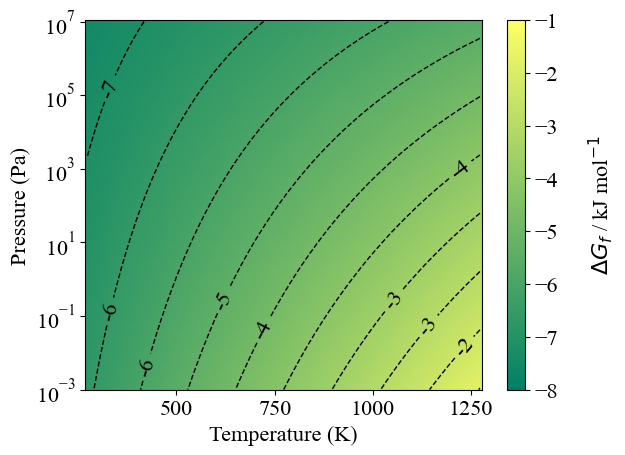

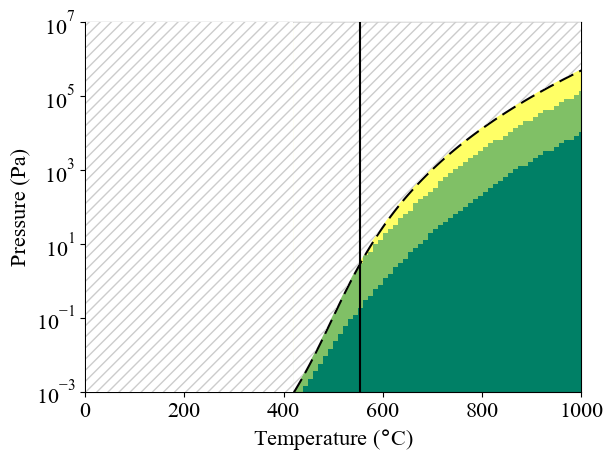

In [28]:
BaS_reaction = reactions.Reaction({Ba:4,S2:6},{BaS:4,S2:4},temperature=T,pressure=P,fu=4)
BaS2_reaction = reactions.Reaction({Ba:4,S2:6},{BaS2:4,S2:2},temperature=T,pressure=P,fu=4)
BaS3_reaction = reactions.Reaction({Ba:4,S2:6},{BaS3_P4:4},temperature=T,pressure=P,fu=4)
BaS3_P2_reaction = reactions.Reaction({Ba:4,S2:6},{BaS3_P2:4},temperature=T,pressure=P,fu=4)
BaS_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-8,-1])
BaS2_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-8,-1])
BaS3_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-8,-1])
BaS3_P2_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-8,-1])

BaS_system = potentials.Potentials(BaS_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_P2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3"],log_scale=True,sulphur_gas=True,filename='main/Ba-S-system-S2.svg',T_units="C",gas_phase="S2",melting_point=True)
#plt.hlines([2,5,0.1],823,863,color='red')
#plt.vlines([823,863],1E-1,5,color='red')

Yellow Purple is BaS, green is BaS2 and dark green is BaS3

### with S8
8Ba +  3S8 --> 8BaS   +  2S8        
8Ba +  3S8 --> 8BaS2  +  S8       
8Ba +  3S8 --> 8BaS3         
8Ba +  3S8 --> 8BaS3           

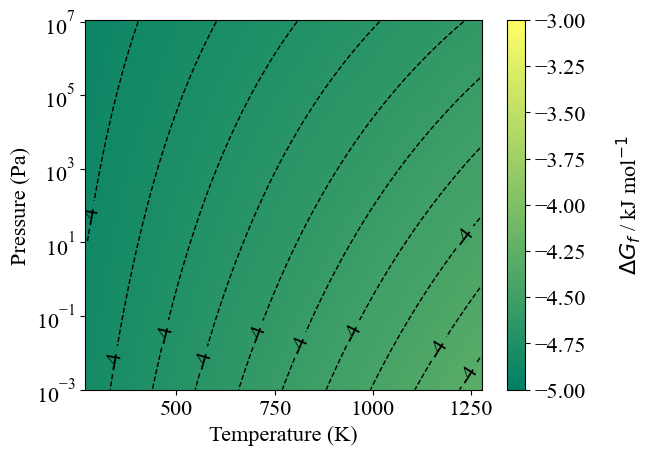

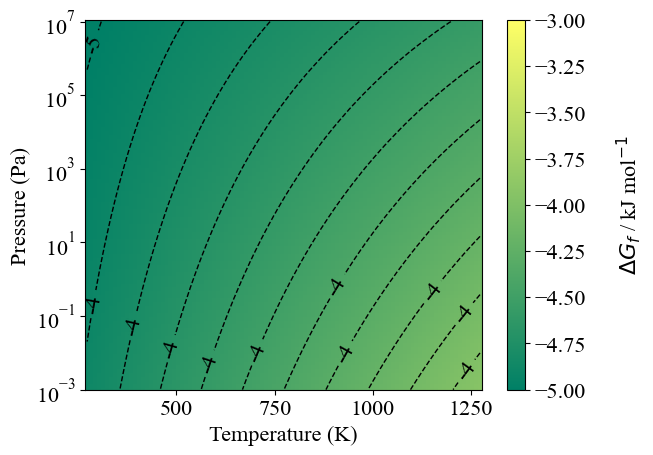

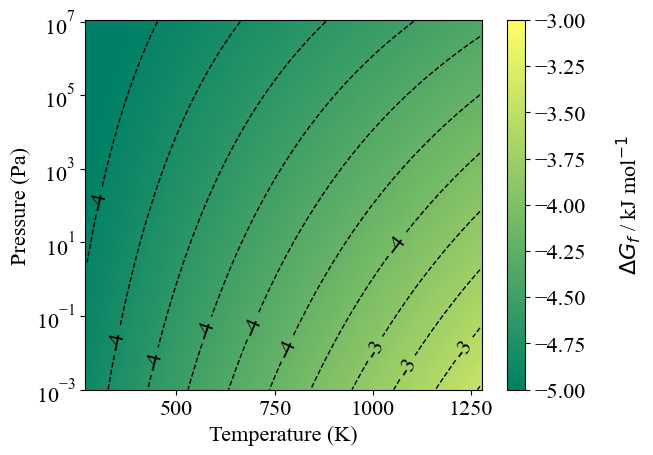

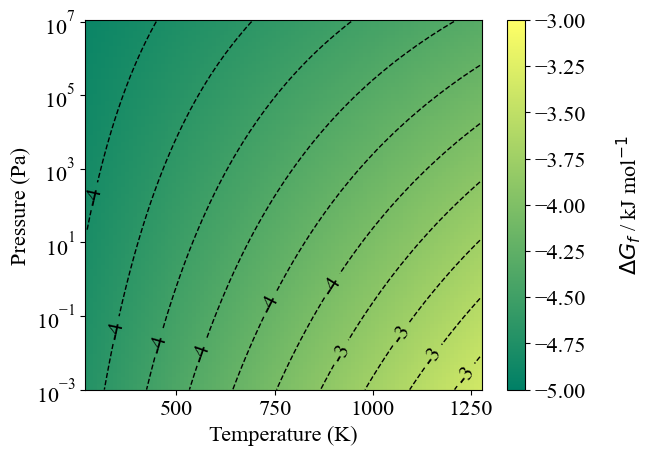

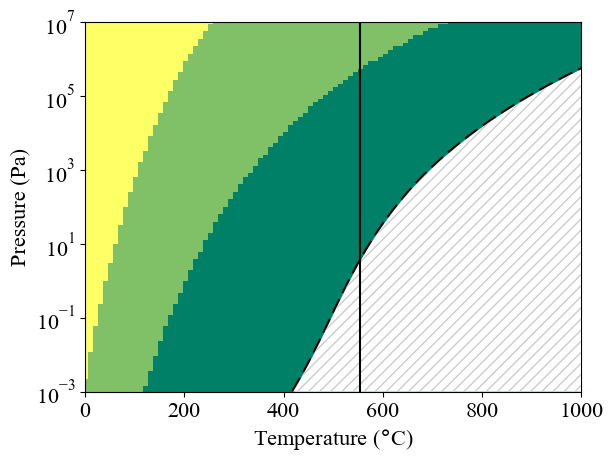

In [29]:
BaS_reaction = reactions.Reaction({Ba:8,S8:3},{BaS:8,S8:2},temperature=T,pressure=P,fu=8)
BaS2_reaction = reactions.Reaction({Ba:8,S8:3},{BaS2:8,S8:1},temperature=T,pressure=P,fu=8)
BaS3_reaction = reactions.Reaction({Ba:8,S8:3},{BaS3_P4:8},temperature=T,pressure=P,fu=8)
BaS3_P2_reaction = reactions.Reaction({Ba:8,S8:3},{BaS3_P2:8},temperature=T,pressure=P,fu=8)
BaS_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3])
BaS2_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3])
BaS3_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3])
BaS3_P2_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3])
BaS_system = potentials.Potentials(BaS_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3","BaS3_P2"],log_scale=True,sulphur_gas=True,filename='main/Ba-S-system-S8.svg',T_units="C",gas_phase="S8",melting_point=True)
#plt.hlines([2,5,0.1],823,863,color='red')
#plt.vlines([823,863],1E-1,5,color='red')

## Zr-S system

### with S2
2Zr + 3S2 --> 2ZrS + 2S2      
2Zr + 3S2 --> 2ZrS2 + S2               
2Zr + 3S2 --> 2ZrS3 

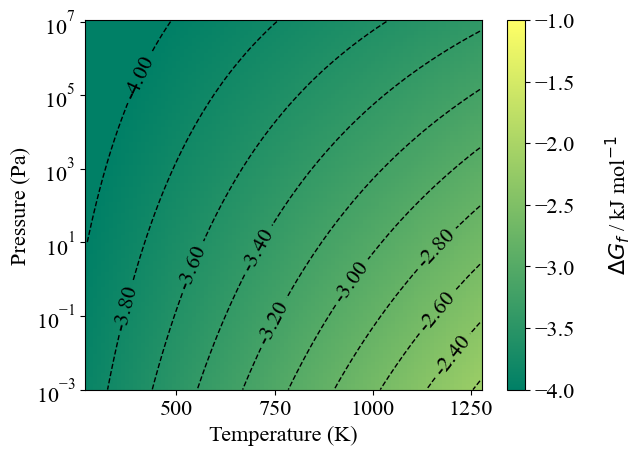

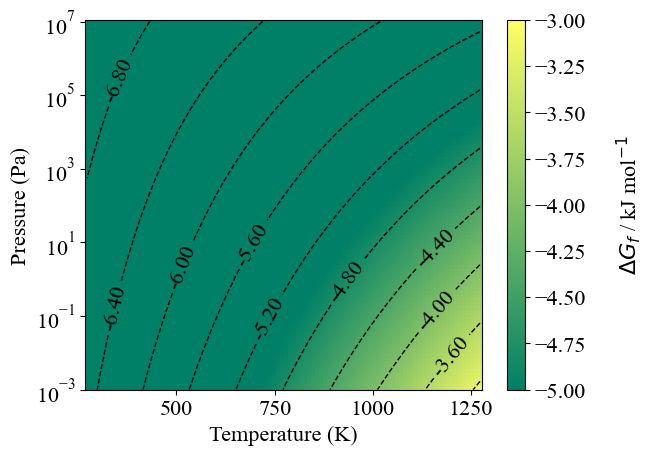

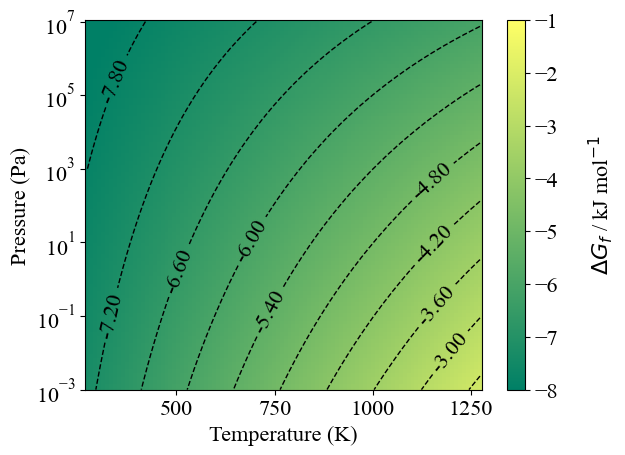

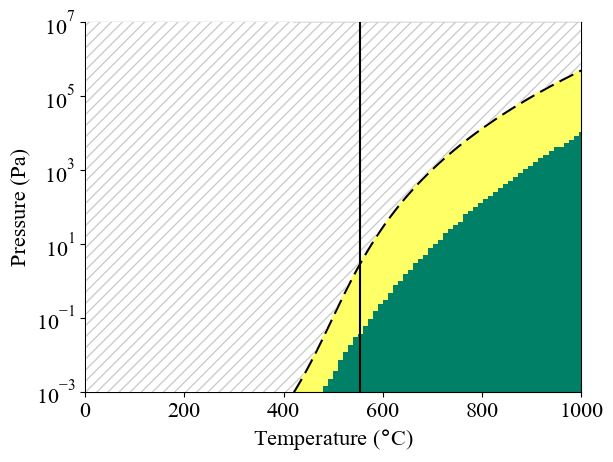

In [30]:
ZrS_reaction = reactions.Reaction({Zr:2,S2:3},{ZrS_P4:2,S2:2},temperature=T,pressure=P,fu=2)
ZrS2_reaction = reactions.Reaction({Zr:2,S2:3},{ZrS2:2,S2:1},temperature=T,pressure=P,fu=2)
ZrS3_reaction = reactions.Reaction({Zr:2,S2:3},{ZrS3_P2:2},temperature=T,pressure=P,fu=2)
ZrS_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-4,-1],precision="%.2f")
ZrS2_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3],precision="%.2f")
ZrS3_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-8,-1],precision="%.2f")
ZrS_system = potentials.Potentials(ZrS2_reaction.Dmu(xc='scan'),ZrS3_reaction.Dmu(xc='scan'))
plt = ZrS_system.plot_TvsP(material_labels=["ZrS","ZrS2","ZrS3"],sulphur_gas=True,filename='main/Zr-S-system-S2.svg',T_units="C",melting_point=True)
#plt.hlines([2,5,0.1],823,863,color='red')
#plt.vlines([823,863],1E-1,5,color='red')

### with S8
8Zr + 3S8 --> 8ZrS + 2S8      
8Zr + 3S8 --> 8ZrS2 + S8               
8Zr + 3S8 --> 8ZrS3      


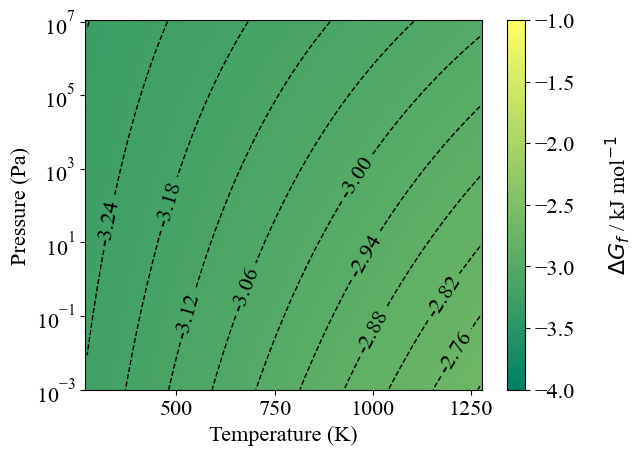

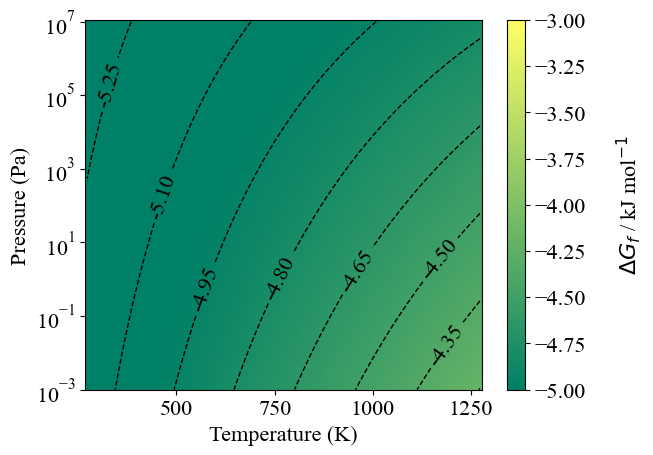

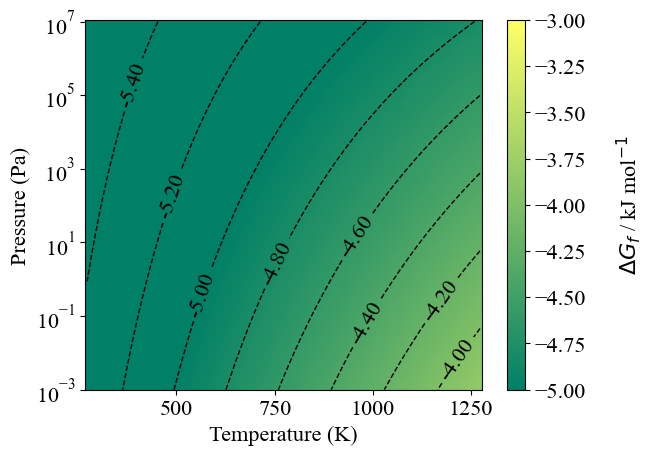

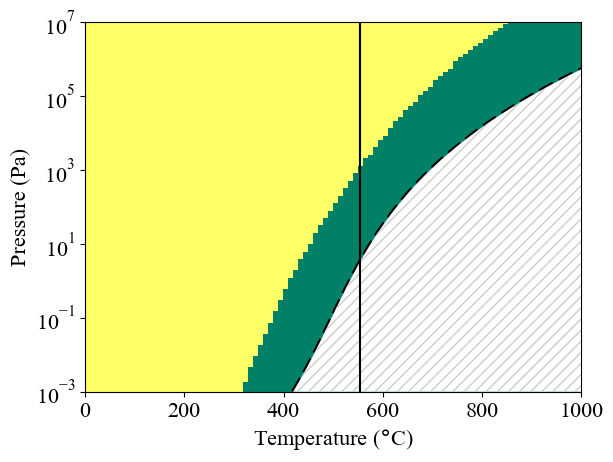

In [32]:
ZrS_reaction = reactions.Reaction({Zr:8,S8:3},{ZrS_P4:8,S8:2},temperature=T,pressure=P,fu=8)
ZrS2_reaction = reactions.Reaction({Zr:8,S8:3},{ZrS2:8,S8:1},temperature=T,pressure=P,fu=8)
ZrS3_reaction = reactions.Reaction({Zr:8,S8:3},{ZrS3_P2:8},temperature=T,pressure=P,fu=8)
ZrS_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-4,-1],precision="%.2f")
ZrS2_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3],precision="%.2f")
ZrS3_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3],precision="%.2f")
ZrS_system = potentials.Potentials(ZrS_reaction.Dmu(xc='scan'),ZrS2_reaction.Dmu(xc='scan'),ZrS3_reaction.Dmu(xc='scan'))
plt = ZrS_system.plot_TvsP(material_labels=["ZrS","ZrS2","ZrS3"],sulphur_gas=True,filename='main/Zr-S-system-S8.svg',T_units="C",gas_phase="S8",melting_point=True)
#plt.hlines([2,5,0.1],823,863,color='red')
#plt.vlines([823,863],1E-1,5,color='red')

Yellow is ZrS3 and green is ZrS2